In [98]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Loading the dataset

In [99]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [103]:
len(X_test)

10000

In [101]:
X_train[0].shape

(28, 28)

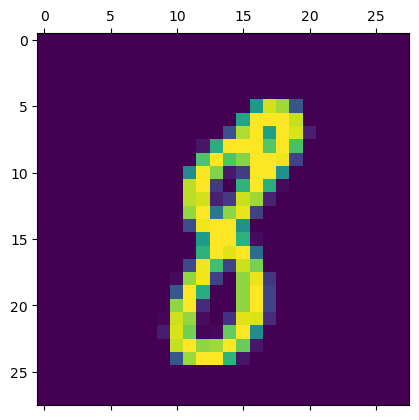

In [102]:
plt.matshow(X_train[300])

Normalizing the pixel values between 0 and 1 

In [25]:
X_train=X_train/255
X_test=X_test/255

Reshaping X_train(matrix) into X_train_flattened(column vector)

In [26]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened[67].shape

(784,)

ANN architecture

In [78]:
model=keras.Sequential([keras.layers.Dense(512,input_shape=(784,),activation='tanh'),
                        keras.layers.Dense(256,input_shape=(784,),activation='tanh'),
                        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [79]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [89]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1048 - accuracy: 0.9677
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0763 - accuracy: 0.9769
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0592 - accuracy: 0.9808
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0456 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0380 - accuracy: 0.9875


In [90]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0765 - accuracy: 0.9764


[0.0764787569642067, 0.9764000177383423]

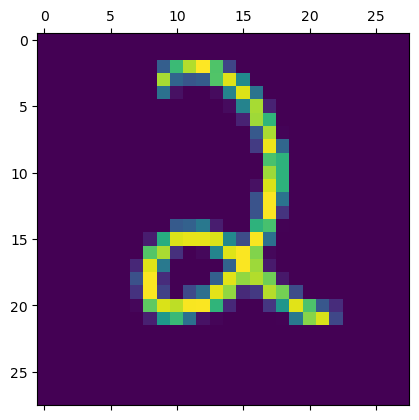

In [91]:
plt.matshow(X_test[47])

In [92]:
y_predicted=model.predict(X_test_flattened)
y_predicted.shape

313/313 [==============================] - 2s 5ms/step


(10000, 10)

In [93]:
y_predicted[47]

array([7.0344973e-01, 7.1941304e-01, 1.0000000e+00, 5.0854367e-01,
       4.6045256e-01, 1.3393779e-04, 9.9465674e-01, 5.9411037e-03,
       9.7126693e-01, 1.2993565e-04], dtype=float32)

In [94]:
np.argmax(y_predicted[47])

2

In [95]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

Confusion Matrix

In [96]:
confusionmatrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
confusionmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    0,    1,    1,    2,    2,    1,    0],
       [   0, 1119,    3,    3,    0,    1,    4,    2,    3,    0],
       [   7,    0, 1014,    2,    1,    0,    1,    4,    3,    0],
       [   0,    0,    7,  987,    0,    2,    0,    4,    4,    6],
       [   0,    0,    2,    0,  960,    1,    3,    2,    3,   11],
       [   3,    0,    0,   14,    1,  862,    7,    1,    2,    2],
       [   5,    1,    0,    1,   17,    5,  926,    0,    3,    0],
       [   1,    1,   13,    3,    1,    0,    0, 1001,    1,    7],
       [   4,    0,    8,    5,    0,    2,    1,    7,  943,    4],
       [   3,    1,    1,    4,    9,    2,    0,   10,    0,  979]])>

Text(158.22222222222223, 0.5, 'True Label')

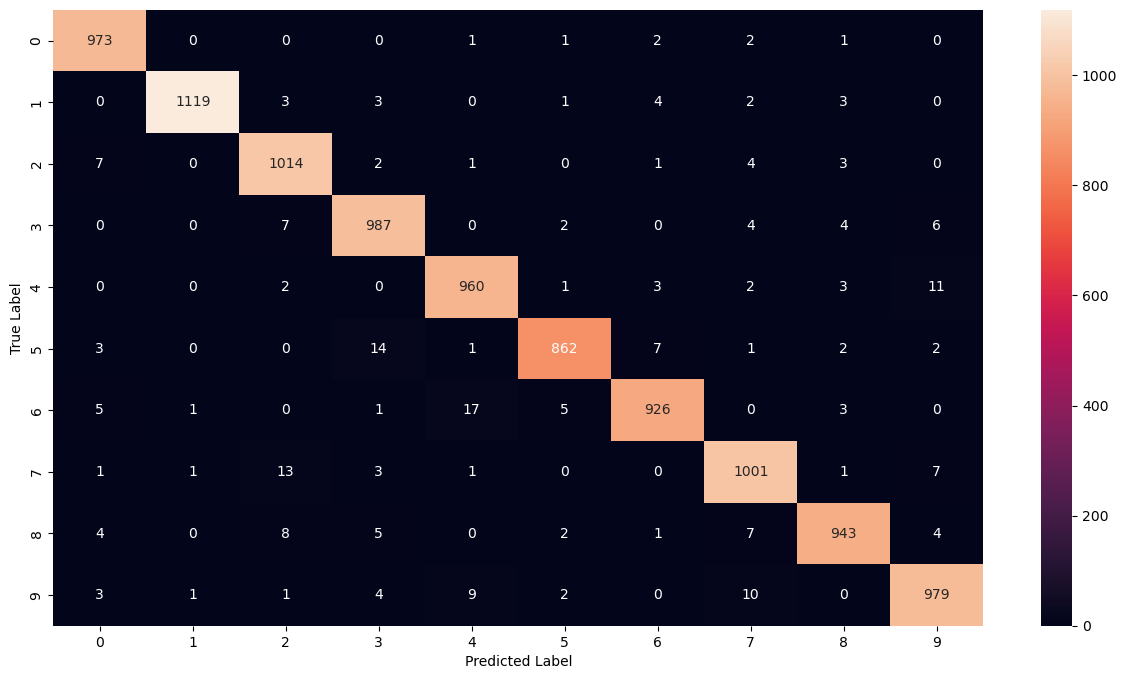

In [97]:
import seaborn as sn
plt.figure(figsize=(15,8))
sn.heatmap(confusionmatrix,annot=True,fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')